In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Trader Dataset**

In [2]:
trader_url =  "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
trader_df = pd.read_csv(trader_url)

trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

**Note: Dataset contain 211224 rows and 16 columns**

In [4]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [5]:
trader_df.shape

(211224, 16)

* Data set contain 211224 rows and 16 columns

In [6]:
trader_df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


**Column Divede into categories**

In [7]:
unique_identifier_colum = ['Account','Transaction Hash','Order ID','Trade ID']
continuous_col = ['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee']
categorical_col = ['Coin','Side','Direction']
timeseries_col = ['Timestamp IST','Timestamp']
Boolean_col = ['Crossed']

In [8]:
trader_df[continuous_col].describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593


In [9]:
for i in trader_df[continuous_col]:
 print( f'skewness of {i}',trader_df[i].skew())

skewness of Execution Price 2.2994160295346795
skewness of Size Tokens 70.14021703848462
skewness of Size USD 43.77744808435803
skewness of Start Position -8.684498105062106
skewness of Closed PnL 30.69941539765908
skewness of Fee 35.5342554694308


**Dataset continuous_columns are skewed most of right skew and start position is left skewed**

**Unique value and Value counts**

In [10]:
for i in trader_df[categorical_col]:
  print(f'unique value of {i} is :',trader_df[i].unique())
  print(f'value count of {i} is :',trader_df[i].value_counts())

unique value of Coin is : ['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT' 'WCT' 'OGN' 'HYPER' 'ZORA' '

**Histogram for continuous columns**

Histogram of Execution Price Axes(0.125,0.11;0.775x0.77)


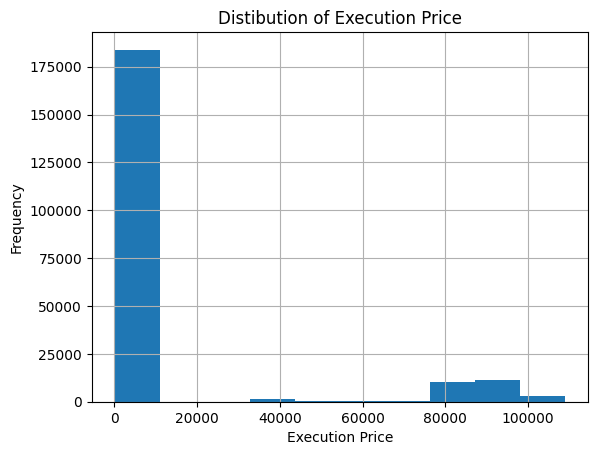

In [11]:

  print('Histogram of Execution Price',trader_df['Execution Price'].hist())
  plt.xlabel('Execution Price')
  plt.title('Distibution of Execution Price')
  plt.ylabel('Frequency')

  plt.savefig('Execution_Price_col_histogram.png')
  plt.show()

Histogram of Size Tokens Axes(0.125,0.11;0.775x0.77)


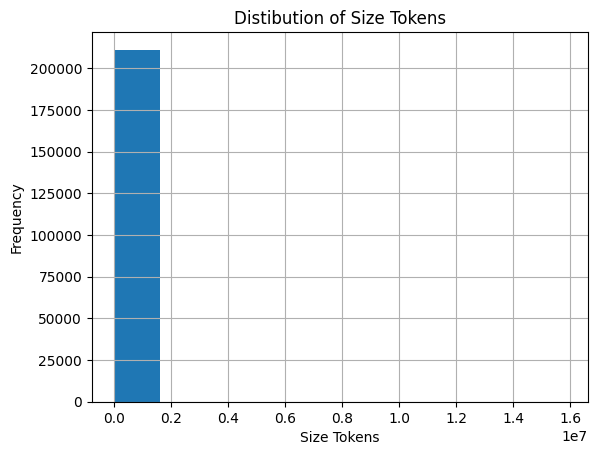

In [12]:
  print('Histogram of Size Tokens',trader_df['Size Tokens'].hist())
  plt.xlabel('Size Tokens')
  plt.title('Distibution of Size Tokens')
  plt.ylabel('Frequency')
  plt.savefig('Size_Tokens_col_histogram.png')
  plt.show()

Histogram of Size USD Axes(0.125,0.11;0.775x0.77)


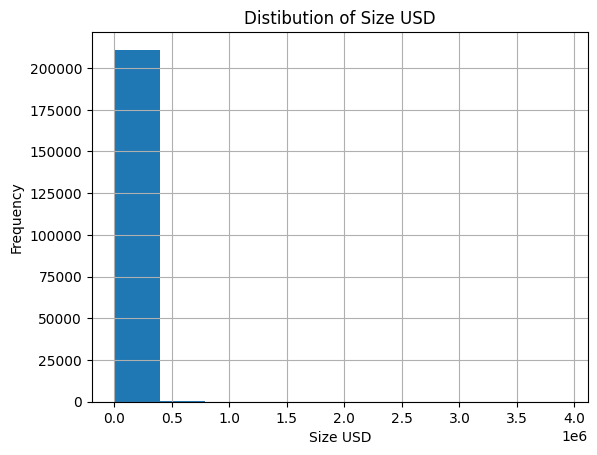

In [13]:
  print('Histogram of Size USD',trader_df['Size USD'].hist())
  plt.xlabel('Size USD')
  plt.title('Distibution of Size USD')
  plt.ylabel('Frequency')
  plt.savefig('Size_USD_col_histogram.png')
  plt.show()

Histogram of Start Position Axes(0.125,0.11;0.775x0.77)


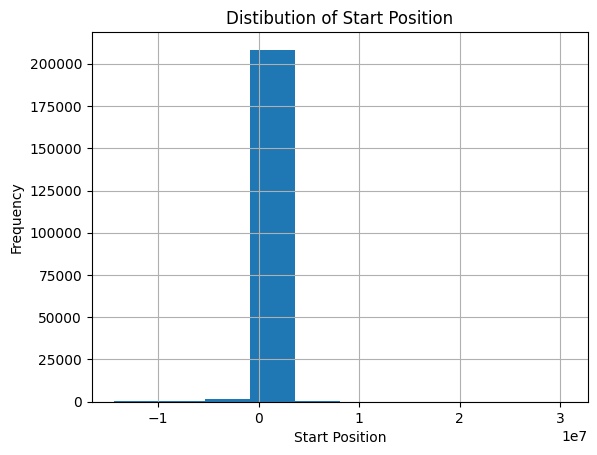

In [14]:
print('Histogram of Start Position',trader_df['Start Position'].hist())
plt.xlabel('Start Position')
plt.title('Distibution of Start Position')
plt.ylabel('Frequency')
plt.savefig('Start_Position_col_histogram.png')
plt.show()

histogram of Closed PnL Axes(0.125,0.11;0.775x0.77)


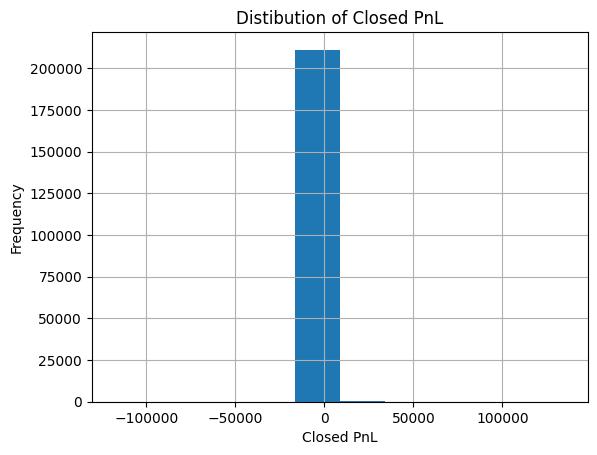

In [15]:
print('histogram of Closed PnL',trader_df['Closed PnL'].hist())
plt.xlabel('Closed PnL')
plt.title('Distibution of Closed PnL')
plt.ylabel('Frequency')
plt.savefig('Closed_PnL_col_histogram.png')
plt.show()

histogram of Fee Axes(0.125,0.11;0.775x0.77)


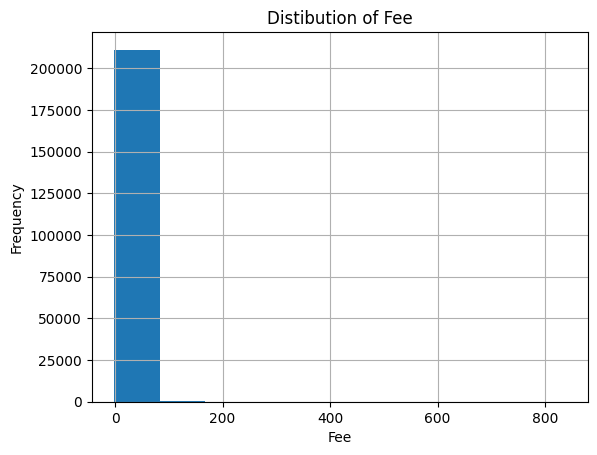

In [16]:
print('histogram of Fee',trader_df['Fee'].hist())
plt.xlabel('Fee')
plt.title('Distibution of Fee')
plt.ylabel('Frequency')
plt.savefig('Fee_col_histogram.png')
plt.show()

**Outlier in continuous columns**




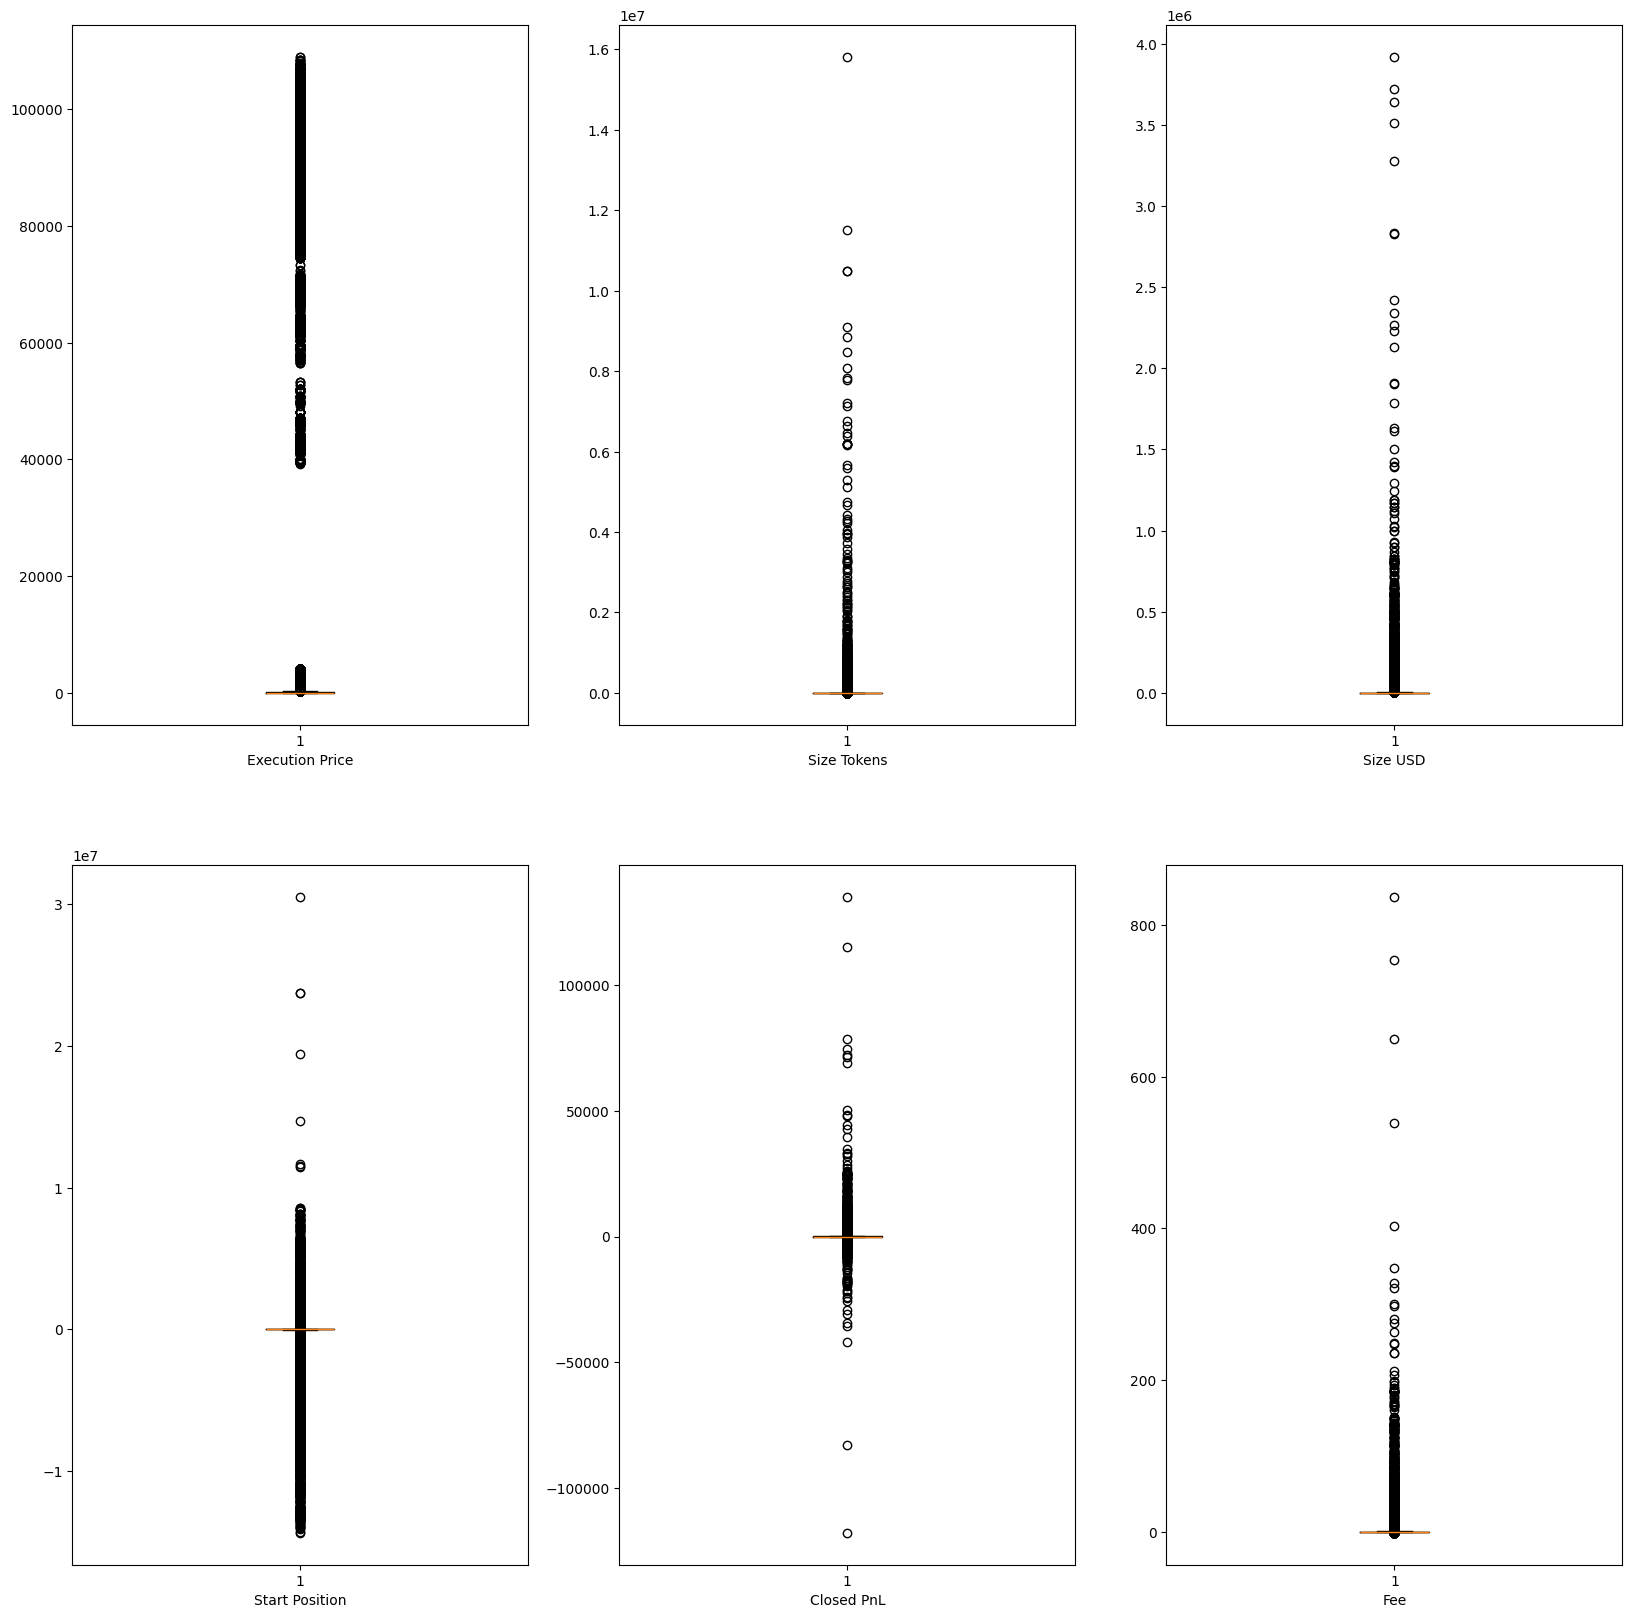

In [17]:
plt.figure(figsize = (20,20))
a=1
for i in trader_df[continuous_col]:
  plt.subplot(2,3,a)
  plt.boxplot(trader_df[i])
  plt.xlabel(i)
  a = a+1
plt.savefig('trader_data_col_boxplot.png')
plt.show()


**Here outlier is available in each columns**

In [18]:
trader_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


**In Trader dataset there is no missing values**

In [19]:
trader_df.duplicated().sum()

np.int64(0)

**In the trader dataset there is no duplicate value**

In [20]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

In [21]:
trader_df = trader_df.drop(columns=unique_identifier_colum,axis = 1)

**Unique_identifier columns were deleted and take only important features**

### Sentiment Dataset

In [22]:
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
sentiment_df = pd.read_csv(sentiment_url)

sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [23]:

sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [24]:
sentiment_df.shape

(2644, 4)

**Sentiment dataset contain 2644 rows and 4 columns**

In [25]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


**Dataset contain 2644 rows and 4 columns**

In [26]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [27]:
sentiment_df.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [28]:
timeseries_col_senti = ['timestamp','date']
continuous_col = ['value']
categorical_col_sent = ['classification']

In [29]:
sentiment_df[continuous_col].describe()

,value
count,2644.000000
mean,46.981089
std,21.827680
min,5.000000
25%,28.000000
50%,46.000000
75%,66.000000
max,95.000000


**In the sentiment dataset 'value' columns contain minimum value 5 and maximum value 95**



In [30]:
sentiment_df['value'].skew()

np.float64(0.2016763657705364)

**value columns in normally distributed**

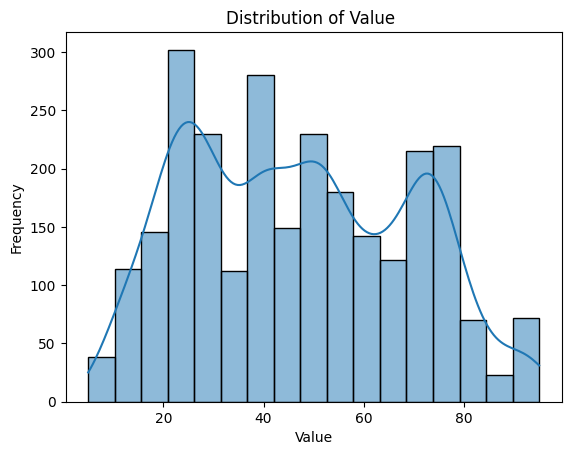

In [31]:
sns.histplot(sentiment_df['value'],kde = True)
plt.title('Distribution of Value ')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('Value_col_histogram.png')
plt.show()

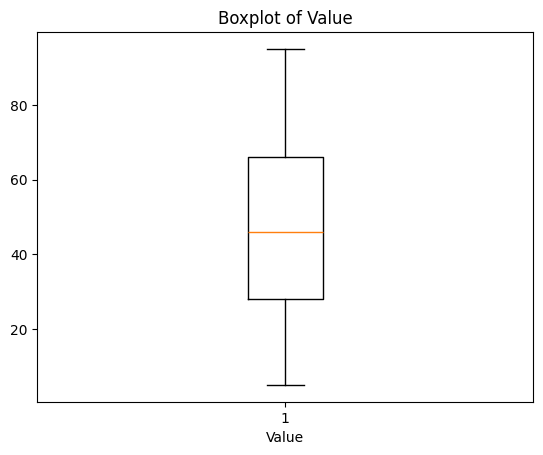

In [32]:
plt.boxplot(sentiment_df['value'])
plt.title('Boxplot of Value')
plt.xlabel('Value')
plt.savefig('Value_col_boxplot.png')
plt.show()

**In the value columns there is no outlier is available**

In [33]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


**In the sentiment dataset there is no missing values**

In [34]:
sentiment_df.duplicated().sum()

np.int64(0)

**In the sentiment dataset there is no duplicate value**

In [35]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [36]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [37]:
merged_df = pd.merge(trader_df,
                     sentiment_df[['timestamp','value','classification','date']],
                     on = 'date',
                     how = 'left'
                     )
merged_df

merged_df.to_csv('merged_data.csv')

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             211224 non-null  object 
 1   Execution Price  211224 non-null  float64
 2   Size Tokens      211224 non-null  float64
 3   Size USD         211224 non-null  float64
 4   Side             211224 non-null  object 
 5   Timestamp IST    211224 non-null  object 
 6   Start Position   211224 non-null  float64
 7   Direction        211224 non-null  object 
 8   Closed PnL       211224 non-null  float64
 9   Crossed          211224 non-null  bool   
 10  Fee              211224 non-null  float64
 11  Timestamp        211224 non-null  float64
 12  date             211224 non-null  object 
 13  timestamp        211218 non-null  float64
 14  value            211218 non-null  float64
 15  classification   211218 non-null  object 
dtypes: bool(1), float64(9), object(6)
memo

In [39]:
merged_df.shape

(211224, 16)

**merged dataset contain 211224 rows and 16 columns**

In [40]:
merged_df.dtypes

,0
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64
Crossed,bool


In [41]:
merged_df.columns

Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Crossed',
       'Fee', 'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')

**Columns distributed acording to their categories**

In [42]:
continuou_columns = ['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee','value']
categorical_columns = ['Coin','Side','Direction','Crossed','classification']
timeseries_columns  = ['Timestamp IST','Timestamp','date','timestamp']

In [43]:
merged_df[continuou_columns].describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,value
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000,211218.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967,51.649656
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854,21.012784
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,10.000000
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121,33.000000
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578,49.000000
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811,72.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593,94.000000


In [44]:
merged_df[continuou_columns].skew()

,0
Execution Price,2.299416
Size Tokens,70.140217
Size USD,43.777448
Start Position,-8.684498
Closed PnL,30.699415
Fee,35.534255
value,-0.008299


In [45]:
merged_df.isnull().sum()

,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0
Crossed,0


In [46]:
merged_df.dropna(inplace = True)

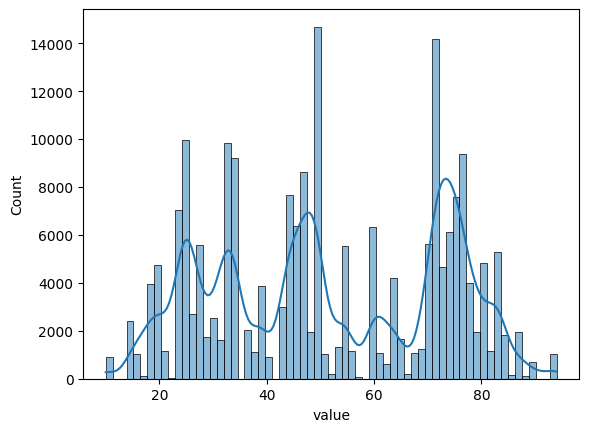

In [47]:
sns.histplot(merged_df['value'],kde = True)
plt.show()

In [48]:
merged_df.columns

Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Crossed',
       'Fee', 'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')

**Side column contain Buy and Sell categories**

**Scatter plot**

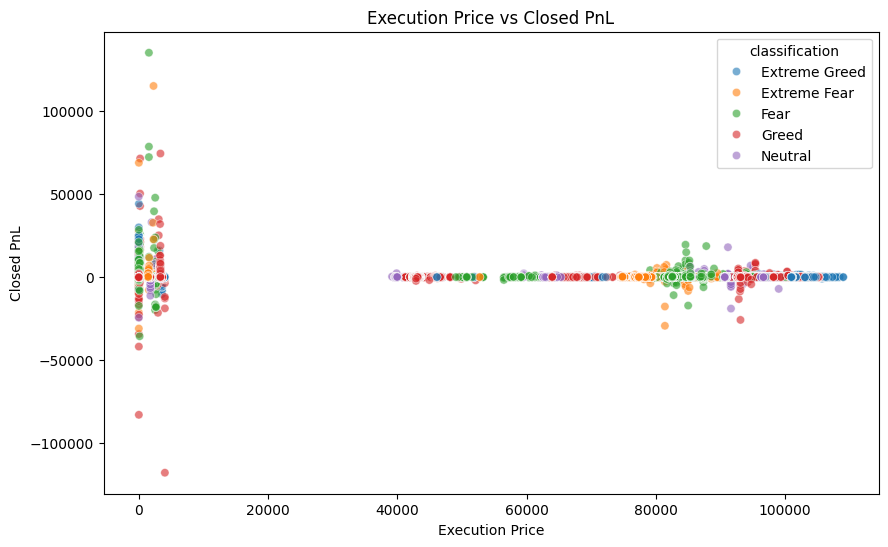

In [49]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Execution Price',y = 'Closed PnL',data = merged_df,hue = 'classification',alpha = 0.6)
plt.title('Execution Price vs Closed PnL')
plt.xlabel('Execution Price')
plt.ylabel('Closed PnL')
plt.savefig('Execution_Price_vs_Closed_PnL_Scatter.png')
plt.show()

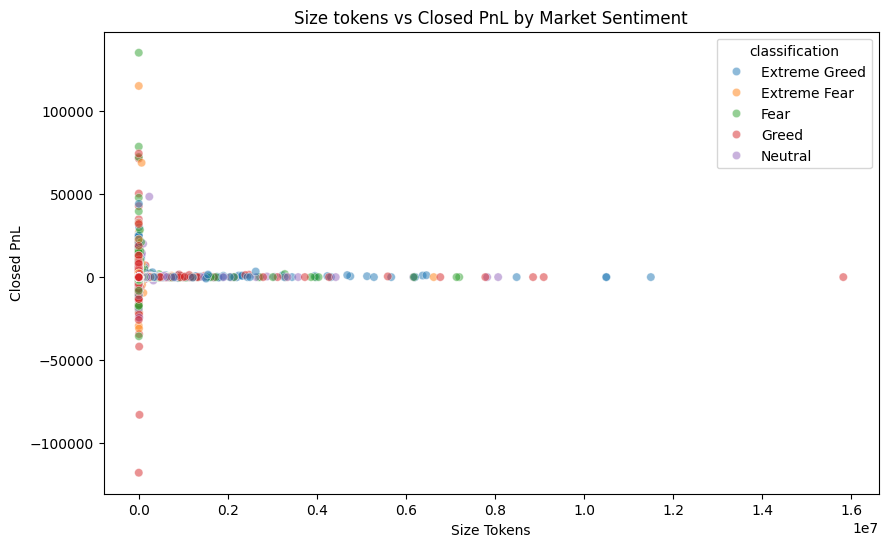

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size Tokens', y='Closed PnL', hue='classification', data=merged_df, alpha=0.5)
plt.title('Size tokens vs Closed PnL by Market Sentiment')
plt.xlabel('Size Tokens')
plt.ylabel('Closed PnL')
plt.savefig('Size_Tokens_vs_Closed_PnL_Scatter.png')
plt.show()


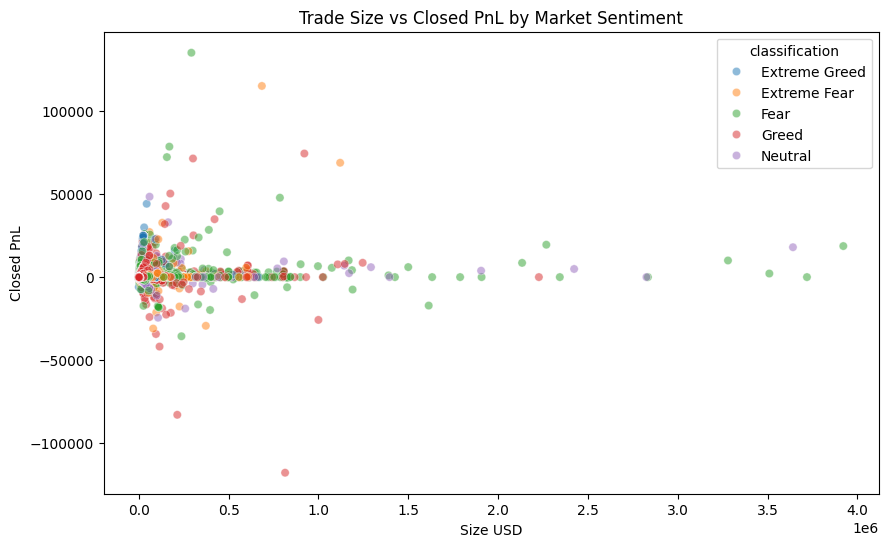

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size USD', y='Closed PnL', hue='classification', data=merged_df, alpha=0.5)
plt.title('Trade Size vs Closed PnL by Market Sentiment')
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.savefig('Size_USD_vs_Closed_PnL_Scatter.png')
plt.show()


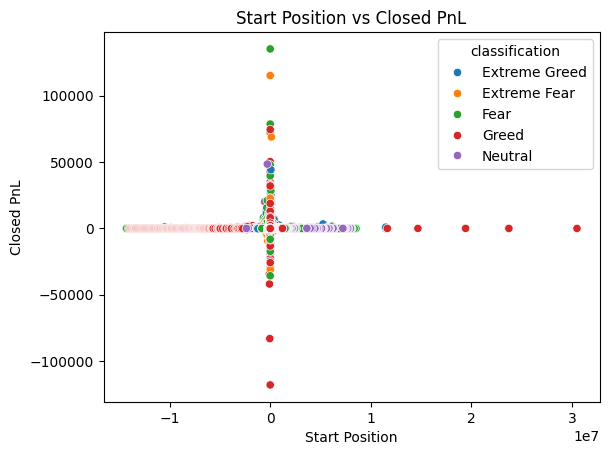

In [52]:
sns.scatterplot(x = 'Start Position',y = 'Closed PnL',data = merged_df,hue = 'classification')
plt.title('Start Position vs Closed PnL')
plt.xlabel('Start Position')
plt.ylabel('Closed PnL')
plt.savefig('Start_Position_vs_Closed_PnL_Scatter.png')
plt.show()

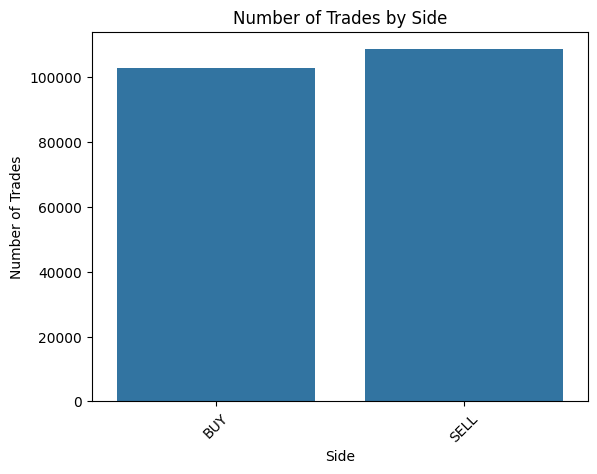

In [53]:
sns.countplot(x = 'Side',data = merged_df)
plt.title('Number of Trades by Side')
plt.xlabel('Side')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.savefig('Side_col_countplot.png')
plt.show()

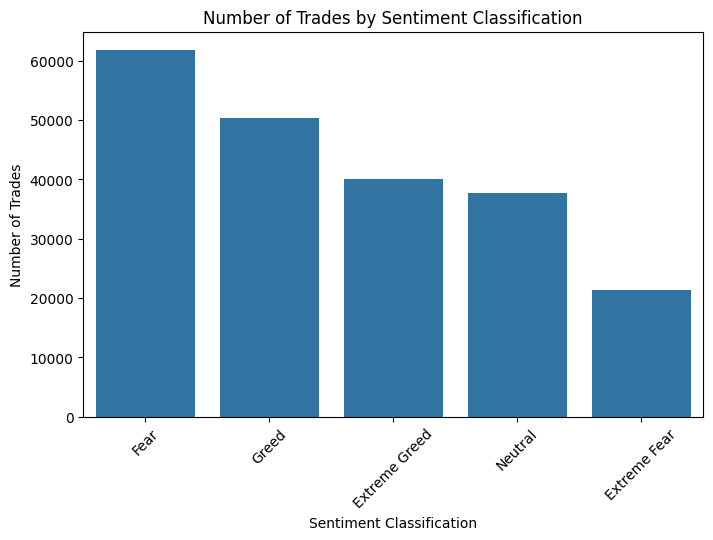

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='classification', data=merged_df, order=merged_df['classification'].value_counts().index)
plt.title('Number of Trades by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.savefig('classification_col_countplot.png')
plt.show()


**Classification column contain Fear ,Greed,Extreme Greed , Neutral and Extreme Fear categories in this Fear categories is more then others**

**Side contain two categories Sell and Buy**

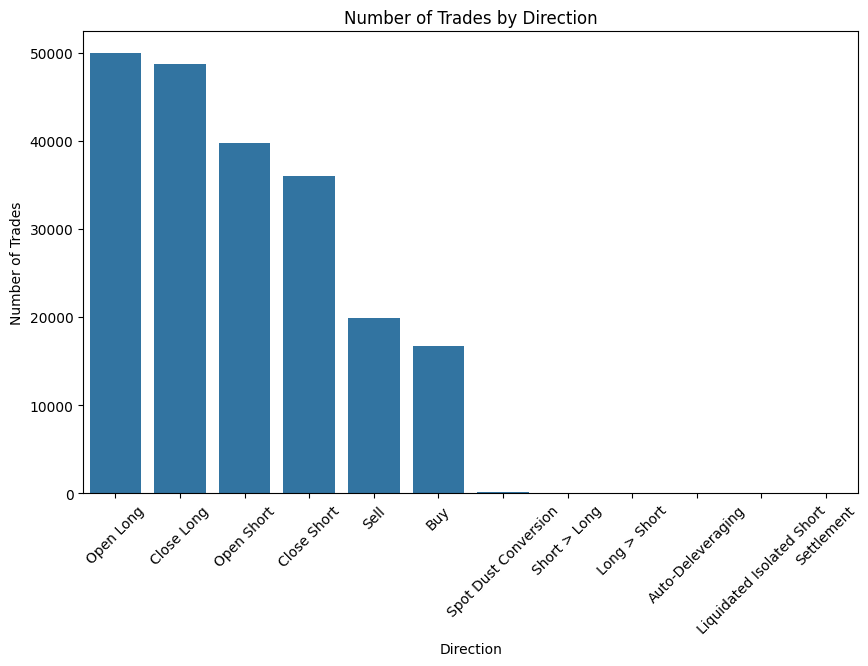

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Direction',data = merged_df,order = merged_df['Direction'].value_counts().index)
plt.title('Number of Trades by Direction')
plt.xlabel('Direction')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.savefig('Direction_col_countplot.png')
plt.show()

**Direction column cantain various categories like
Open Long 	49895,Close Long	48678,Open Short	39741,Close Short	36007,Sell	19902,Buy	16716,Spot Dust Conversion	142,Short > Long	70,Long > Short	57,Auto-Deleveraging	8,Liquidated Isolated Short	1,Settlement	1**

In [56]:
merged_df['Direction'].value_counts()

,count
Direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36007
Sell,19902
Buy,16716
Spot Dust Conversion,142
Short > Long,70
Long > Short,57


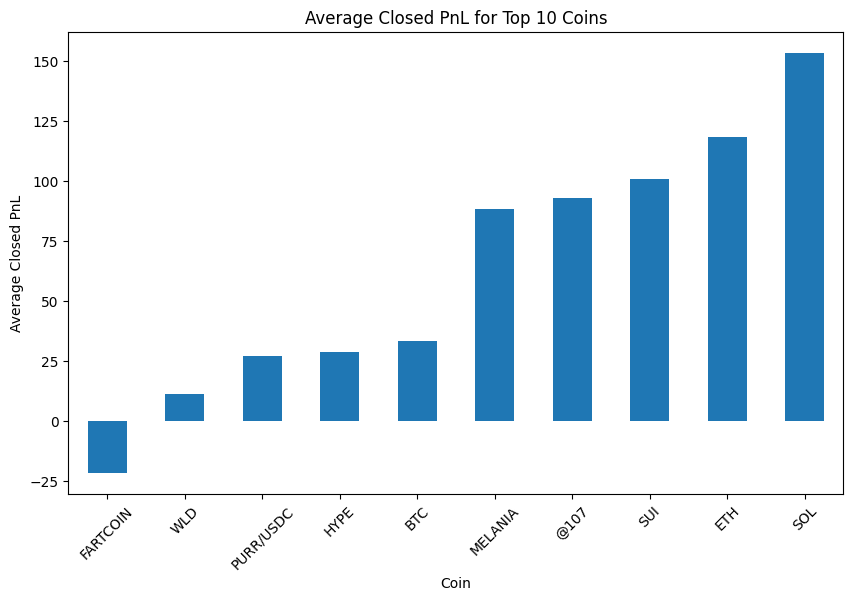

In [57]:
top_coins = merged_df['Coin'].value_counts().head(10).index
avg_pnl_by_coin = merged_df[merged_df['Coin'].isin(top_coins)].groupby('Coin')['Closed PnL'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_pnl_by_coin.plot(kind='bar')
plt.title('Average Closed PnL for Top 10 Coins')
plt.ylabel('Average Closed PnL')
plt.xlabel('Coin')
plt.xticks(rotation=45)
plt.savefig('Average_Closed_PnL_for_Top_10_Coins.png')
plt.show()


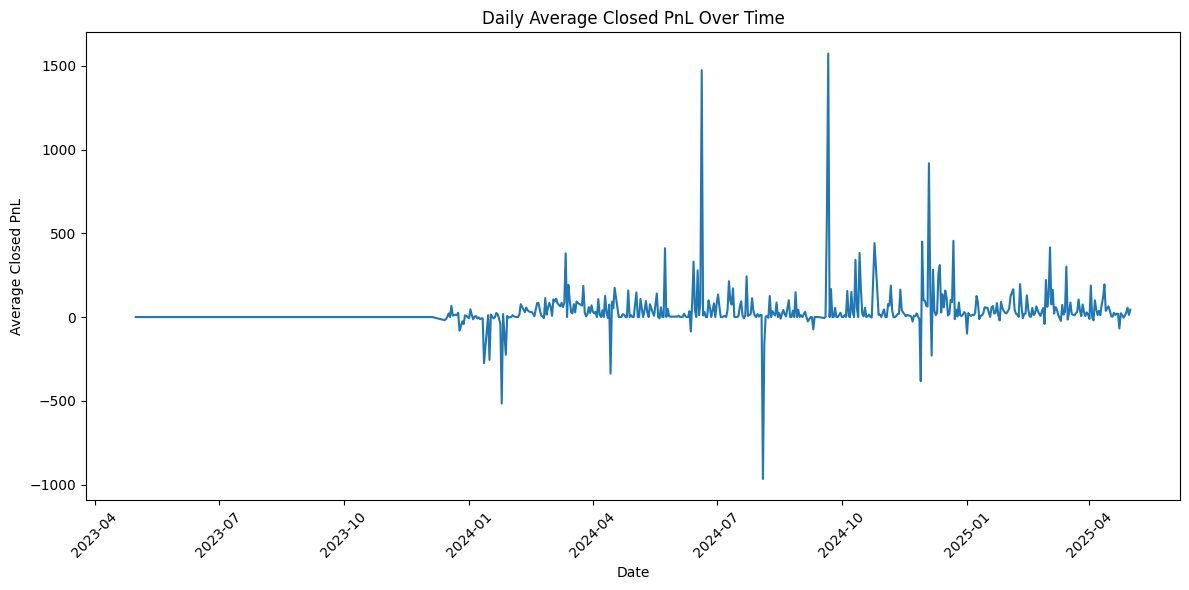

In [58]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
daily_pnl = merged_df.groupby('date')['Closed PnL'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_pnl.index, y=daily_pnl.values)
plt.title('Daily Average Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Daily_Average_Closed_PnL_Over_Time.png')
plt.show()


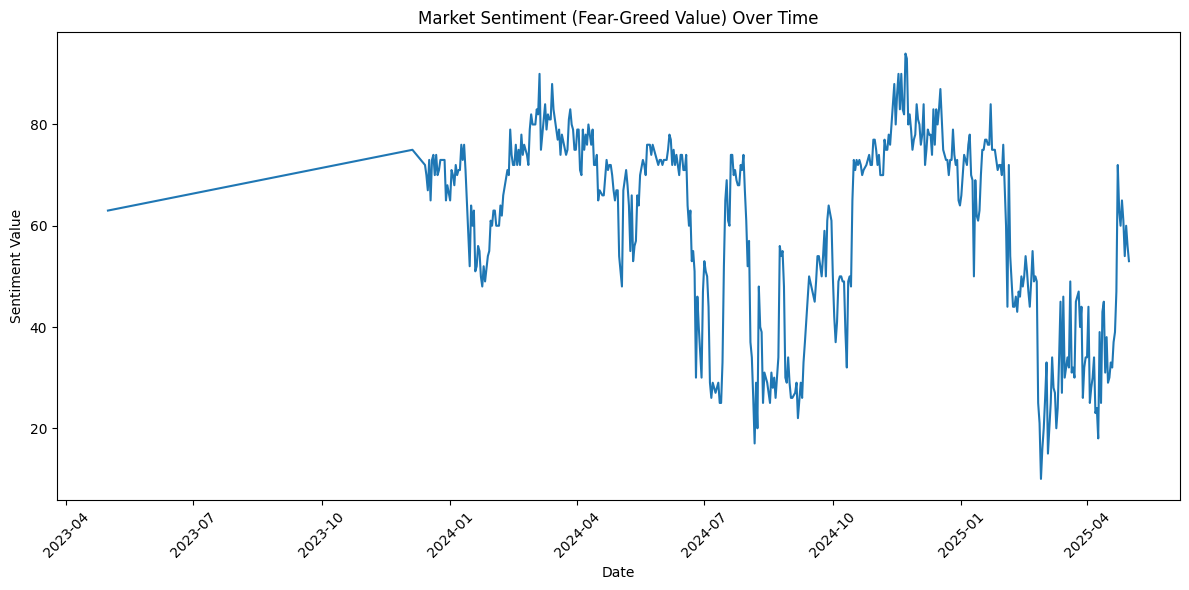

In [59]:
# Group by date and sentiment value
daily_sentiment = merged_df.drop_duplicates('date')[['date', 'value']].sort_values('date')

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='value', data=daily_sentiment)
plt.title('Market Sentiment (Fear-Greed Value) Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Market_Sentiment_Over_Time.png')
plt.show()


In [60]:
corr_matrix = merged_df[continuou_columns].corr()
corr_matrix

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,value
Execution Price,1.000000,-0.017185,0.189859,0.017242,-0.006429,0.225266,-0.027558
Size Tokens,-0.017185,1.000000,0.013310,0.044660,0.005067,0.006710,0.023080
Size USD,0.189859,0.013310,1.000000,0.007787,0.123645,0.745940,-0.029843
Start Position,0.017242,0.044660,0.007787,1.000000,0.004068,0.010559,-0.049619
Closed PnL,-0.006429,0.005067,0.123645,0.004068,1.000000,0.084094,0.008121
Fee,0.225266,0.006710,0.745940,0.010559,0.084094,1.000000,-0.026877
value,-0.027558,0.023080,-0.029843,-0.049619,0.008121,-0.026877,1.000000


**In the correlation Size USD columns is 0.7459 correlated with Fee column**  

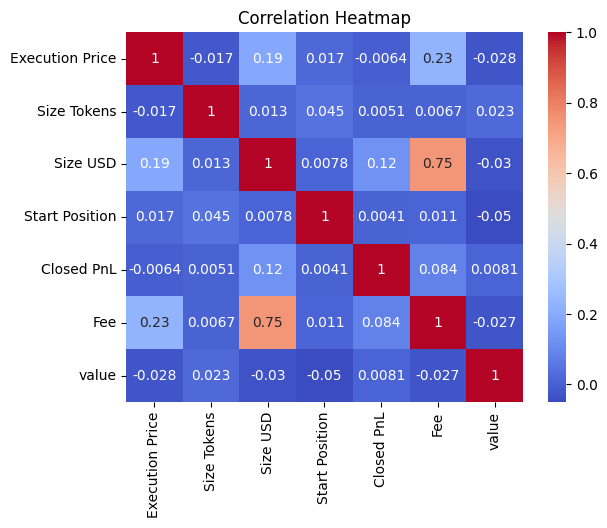

In [61]:
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation_Heatmap.png')
plt.show()

In [62]:
pd.crosstab(merged_df['classification'],merged_df['Side'])

Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


**This is the count of classification columns categories with Side columns categories**

In [63]:
crosstab_result = pd.crosstab(
    index=merged_df['classification'],
    columns=merged_df['Side'],
    margins=True,
    margins_name='Total'
)

crosstab_result


Side,BUY,SELL,Total
classification,,,
Extreme Fear,10935,10465,21400
Extreme Greed,17940,22052,39992
Fear,30270,31567,61837
Greed,24576,25727,50303
Neutral,18969,18717,37686
Total,102690,108528,211218


In [64]:
pd.crosstab(merged_df['Side'],merged_df["Direction"])

Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion
Side,,,,,,,,,,,,
BUY,0,16716,0,36007,1,0,49895,0,0,1,70,0
SELL,8,0,48678,0,0,57,0,39741,19902,0,0,142
